## ADM1F_SRT: Input/output sensitivity

Here we explore the relationships between inputs and outputs. In the `ADM1F: Execution time` example we showed how to run the models with the perturbed input values from  `influent.dat` and `param.dat` files. Assuming that you run the `ADM1F: Execution time` example and produced the `outputs_influent.csv` and `outputs_params.csv` files, we use these outputs here to study the relationship between influents and outputs, and params and outputs. If not just uncomment lines 5 and 18 and re-run the simulations. 

Authors: Wenjuan Zhang and Elchin Jafarov

In [1]:
import adm1f_utils as adm1fu
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Influent/Output sensitivity

In [2]:
# navigate to simulations folder
os.chdir('../simulations')

In [3]:
#Set the path to the ADM1F executable
ADM1F_EXE = 'path-to-your-ADM1F-folder/build/adm1f'

# Set the value of percentage and sample size for lhs
percent = 0.1 # NOTE: for params percent should be <= 0.05 
sample_size = 100
variable = 'influent'    # influent/params/ic
method = 'uniform'    #'uniform' or 'lhs'

In [4]:
index=adm1fu.create_a_sample_matrix(variable,method,percent,sample_size)
print ()
print ('Number of elements participated in the sampling:',len(index))

Saves a sampling matrix [sample_size,array_size] into var_influent.csv
sample_size,array_size:  (100, 11)
Each column of the matrix corresponds to a variable perturbed 100 times around its original value 
var_influent.csv SAVED!

Number of elements participated in the sampling: 11


In [5]:
#exe_time=adm1fu.adm1f_output_sampling(ADM1F_EXE,variable,index)

In [6]:
[output_name,output_unit]=adm1fu.get_output_names()
alloutputs = pd.read_csv('outputs_influent.csv', sep=',', header=None)
alloutputs.columns = output_name

In [7]:
alloutputs

,Ssu,Saa,Sfa,Sva,Sbu,Spro,Sac,Sh2,Sch4,Sic,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
0,7.37820,3.30795,56.7230,6.60272,8.46032,6.26942,1908.38,0.000123,48.7774,615.799,...,8148.98,8.64671,987.952,56.7230,57.2720,66.2091,52.7615,0.222004,116.5620,24.3594
1,7.28460,3.26614,55.8953,6.52078,8.34621,6.18289,2033.37,0.000121,48.4068,645.849,...,8602.48,9.61694,1048.750,55.8953,56.8728,65.9860,53.8907,0.223891,92.1431,24.8179
2,6.85866,3.07582,52.1661,6.11321,7.84990,5.79147,1926.30,0.000114,47.7048,651.060,...,8442.25,9.57599,1031.740,52.1661,56.7510,61.6157,52.8110,0.216106,125.4410,27.1630
3,6.72726,3.01709,51.0289,5.97094,7.70738,5.67153,1931.76,0.000112,47.6768,660.852,...,8558.31,9.84058,1044.000,51.0289,56.6698,61.9098,53.9655,0.213730,116.0810,27.9786
4,7.55763,3.38810,58.3212,6.83699,8.63179,6.43593,2242.26,0.000126,49.1049,657.957,...,9061.95,10.49270,1109.360,58.3212,57.2318,68.8331,51.4620,0.234238,77.3666,23.5162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.65859,3.43319,59.2237,6.78604,8.84032,6.52986,1911.45,0.000128,48.9244,616.258,...,8197.36,8.37148,985.507,59.2237,56.5753,71.6467,52.7621,0.221140,125.5700,23.0752
96,7.40606,3.32040,56.9708,6.57190,8.52763,6.29525,2049.40,0.000123,48.6287,649.584,...,8699.15,9.58421,1054.650,56.9708,56.5357,69.7230,54.2485,0.223168,102.1390,24.2222
97,7.06582,3.16840,53.9710,6.30301,8.09601,5.98132,1778.88,0.000118,48.2397,605.950,...,7819.47,8.22490,949.405,53.9710,57.3804,61.6582,52.9718,0.215719,129.6520,25.9740
98,6.85456,3.07399,52.1312,6.12749,7.83407,5.78776,2146.27,0.000114,48.1629,685.484,...,9144.20,11.07250,1119.840,52.1312,56.8556,64.3136,53.8121,0.222069,88.1808,27.1834


In [8]:
[influent_name,influent_index]=adm1fu.get_influent_names()

In [9]:
# since we did not use all the columns in the influent.dat (see create_a_sample_matrix) 
# we use index to select used headers for used values
header=[]
for i in index:
    header.append(influent_name[i])

influent_inputs = pd.read_csv('var_influent.csv', sep=',', header=None)
influent_inputs.columns = header
influent_inputs.head()

,S_su_in,S_aa_in,S_fa_in,S_ac_in,S_IN_in,X_ch_biom_in,X_pr_biom_in,X_li_biom_in,X_I_in,Q,Temp
0,2.41679,4.54049,3.26551,1.06715,0.00794,8.21103,7.65897,5.45471,18.04704,139.57635,31.64409
1,2.71197,4.44197,2.94117,0.97991,0.00798,8.47247,8.44312,5.01331,16.95071,136.99766,32.47646
2,2.37594,4.05372,3.09329,1.10619,0.00801,8.84280,8.55680,4.62146,18.06979,125.17005,31.95536
3,2.70155,4.55292,3.31319,1.00561,0.00784,9.14260,8.30096,4.69829,17.67225,121.52161,37.86524
4,2.35939,4.30043,3.00319,1.05070,0.00860,8.26193,9.19056,5.36216,19.24420,144.58137,35.68530


In [10]:
# merge influent and output datasets
inout=pd.concat([influent_inputs,alloutputs], axis=1)
inout.head()

,S_su_in,S_aa_in,S_fa_in,S_ac_in,S_IN_in,X_ch_biom_in,X_pr_biom_in,X_li_biom_in,X_I_in,Q,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
0,2.41679,4.54049,3.26551,1.06715,0.00794,8.21103,7.65897,5.45471,18.04704,139.57635,...,8148.98,8.64671,987.952,56.7230,57.2720,66.2091,52.7615,0.222004,116.5620,24.3594
1,2.71197,4.44197,2.94117,0.97991,0.00798,8.47247,8.44312,5.01331,16.95071,136.99766,...,8602.48,9.61694,1048.750,55.8953,56.8728,65.9860,53.8907,0.223891,92.1431,24.8179
2,2.37594,4.05372,3.09329,1.10619,0.00801,8.84280,8.55680,4.62146,18.06979,125.17005,...,8442.25,9.57599,1031.740,52.1661,56.7510,61.6157,52.8110,0.216106,125.4410,27.1630
3,2.70155,4.55292,3.31319,1.00561,0.00784,9.14260,8.30096,4.69829,17.67225,121.52161,...,8558.31,9.84058,1044.000,51.0289,56.6698,61.9098,53.9655,0.213730,116.0810,27.9786
4,2.35939,4.30043,3.00319,1.05070,0.00860,8.26193,9.19056,5.36216,19.24420,144.58137,...,9061.95,10.49270,1109.360,58.3212,57.2318,68.8331,51.4620,0.234238,77.3666,23.5162


The correlation heat map matrix below shows that four influents have the highest impact on the results: `X_ch_biom_in`, `X_pr_biom_in`, `X_li_biom_in`, and `Q`. 

Text(0.5, 23.09375, 'Outputs')

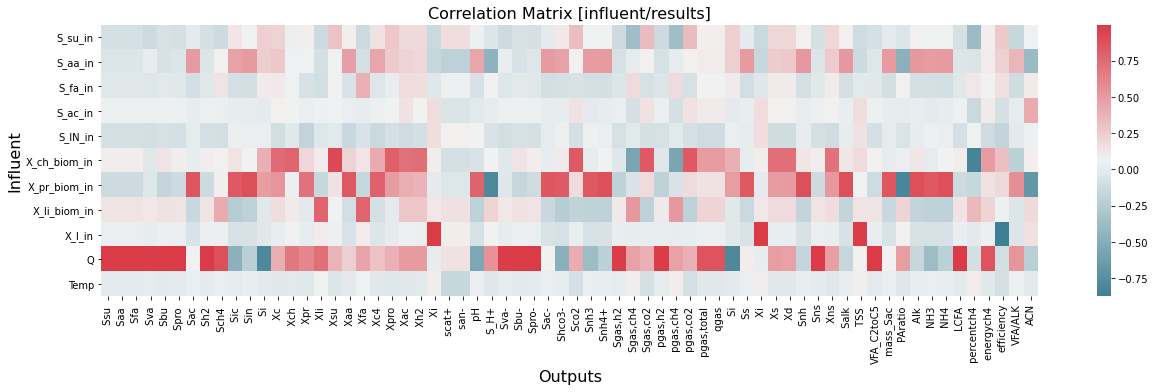

In [11]:
corr=inout.corr()
plt.figure(figsize=(21,5))
sns.heatmap(corr.iloc[0:11,11:-1], cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Matrix [influent/results]',fontsize=16);
plt.ylabel('Influent',fontsize=16)
plt.xlabel('Outputs',fontsize=16)

Let's merge `ph` values from the results with the influents and explore the correlations.   

In [12]:
influent_ph=pd.concat([influent_inputs,alloutputs[' pH ']], axis=1)

(-1.0, 1.0)

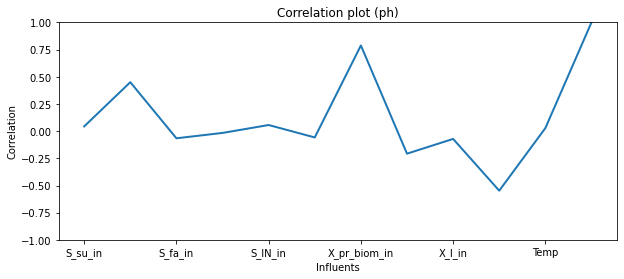

In [13]:
plt.figure(figsize=(10,4))
influent_ph.corr().iloc[-1].plot(linewidth=2)
plt.title('Correlation plot (ph)')
plt.xlabel('Influents')
plt.ylabel('Correlation')
plt.ylim([-1,1])

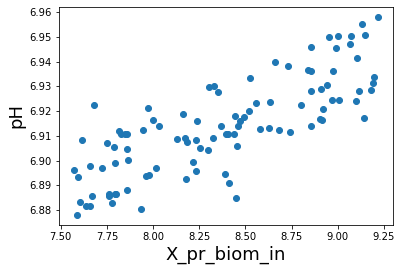

In [14]:
plt.scatter( influent_ph['X_pr_biom_in'],influent_ph[' pH '])
plt.xlabel('X_pr_biom_in',fontsize=18)
plt.ylabel('pH',fontsize=18);

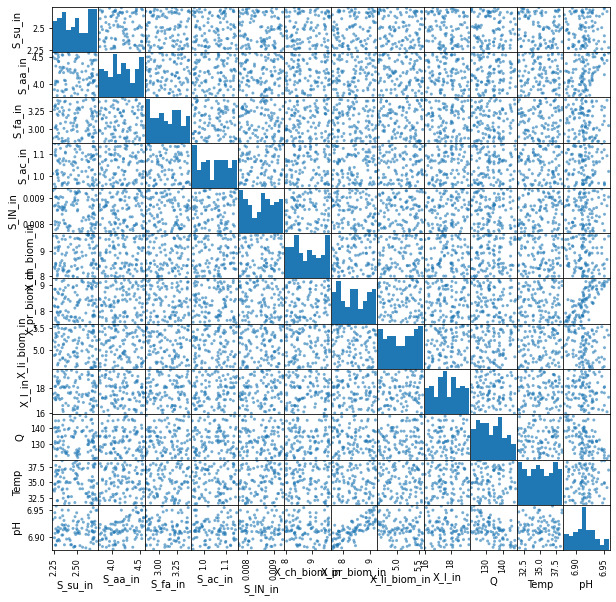

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(influent_ph, alpha=0.6,figsize=(10,10));

### 2. Params/Output sensitivity

In [16]:
# Set the value of percentage and sample size for lhs
percent = 0.1 # NOTE: for params percent should be <= 0.05 
sample_size = 100
variable = 'params'    # influent/params/ic
method = 'uniform'    #'uniform' or 'lhs'

In [17]:
index=adm1fu.create_a_sample_matrix(variable,method,percent,sample_size)
print ()
print ('Number of elements participated in the sampling:',len(index))

Saves a sampling matrix [sample_size,array_size] into var_params.csv
sample_size,array_size:  (100, 92)
Each column of the matrix corresponds to a variable perturbed 100 times around its original value 
var_params.csv SAVED!

Number of elements participated in the sampling: 92


In [18]:
#exe_time=adm1fu.adm1f_output_sampling(ADM1F_EXE,variable,index)

In [19]:
[output_name,output_unit]=adm1fu.get_output_names()
alloutputs = pd.read_csv('outputs_params.csv', sep=',', header=None)
alloutputs.columns = output_name

In [20]:
[param_name,param_index]=adm1fu.get_param_names()

In [21]:
# since we did not use all the columns in the influent.dat (see create_a_sample_matrix) 
# we use index to select used headers for used values
header=[]
for i in index:
    header.append(param_name[i])

param_inputs = pd.read_csv('var_params.csv', sep=',', header=None)
param_inputs.columns = header
param_inputs.head()

,f_sI_xc,f_xI_xc,f_ch_xc,f_pr_xc,f_li_xc,N_xc,N_I,N_aa,C_xc,C_sI,...,k_A_Bpro,k_A_Bac,k_A_Bco2,k_A_BIN,kLa,K_H_h2o_base,K_H_co2_base,K_H_ch4_base,K_H_h2_base,k_P
0,0.09116,0.27346,0.21535,0.21711,0.27475,0.00251,0.00420,0.00736,0.02895,0.02792,...,1.026524e+10,1.086406e+10,9.205019e+09,1.087446e+10,207.51543,0.02859,0.03361,0.00146,0.00071,50821.70460
1,0.09692,0.25605,0.18183,0.21486,0.27367,0.00293,0.00450,0.00648,0.02930,0.02715,...,9.961014e+09,9.209860e+09,9.484090e+09,1.097333e+10,185.69982,0.03129,0.03583,0.00146,0.00079,45097.70847
2,0.09653,0.25089,0.18351,0.19403,0.22666,0.00246,0.00420,0.00649,0.02824,0.03114,...,1.043165e+10,1.081807e+10,9.359366e+09,9.475087e+09,218.85580,0.02930,0.03748,0.00140,0.00074,53707.49901
3,0.09891,0.25074,0.19437,0.20372,0.23318,0.00263,0.00468,0.00666,0.02873,0.02895,...,9.431350e+09,1.031777e+10,9.787729e+09,1.030247e+10,184.26372,0.03229,0.03850,0.00127,0.00086,49069.07961
4,0.10742,0.26412,0.20268,0.20954,0.26893,0.00263,0.00414,0.00723,0.02958,0.03157,...,1.090281e+10,1.020322e+10,1.063838e+10,1.076841e+10,189.12319,0.02950,0.03578,0.00138,0.00083,54000.23123


In [22]:
# merge influent and output datasets
inout=pd.concat([param_inputs,alloutputs], axis=1)
inout.head()

,f_sI_xc,f_xI_xc,f_ch_xc,f_pr_xc,f_li_xc,N_xc,N_I,N_aa,C_xc,C_sI,...,Alk,NH3,NH4,LCFA,percentch4,energych4,efficiency,VFA/ALK,ACN,sampleT
0,0.09116,0.27346,0.21535,0.21711,0.27475,0.00251,0.00420,0.00736,0.02895,0.02792,...,8909.63,9.53919,1060.990,61.5561,56.0945,65.7436,52.8869,0.222452,87.1484,25.3731
1,0.09692,0.25605,0.18183,0.21486,0.27367,0.00293,0.00450,0.00648,0.02930,0.02715,...,7707.69,10.88420,927.238,56.1139,62.1148,62.3272,55.0303,0.147138,654.5290,25.3731
2,0.09653,0.25089,0.18351,0.19403,0.22666,0.00246,0.00420,0.00649,0.02824,0.03114,...,7873.10,8.67396,927.390,68.2248,58.8253,64.9817,54.1026,0.191081,196.3670,25.3731
3,0.09891,0.25074,0.19437,0.20372,0.23318,0.00263,0.00468,0.00666,0.02873,0.02895,...,7961.45,10.83540,953.650,64.3854,57.4965,66.4942,55.2003,0.118815,-1663.6400,25.3731
4,0.10742,0.26412,0.20268,0.20954,0.26893,0.00263,0.00414,0.00723,0.02958,0.03157,...,8755.37,10.43910,1081.950,67.7978,56.9557,64.9350,53.1639,0.222974,94.6821,25.3731


Text(0.5, 113.09375, 'Outputs')

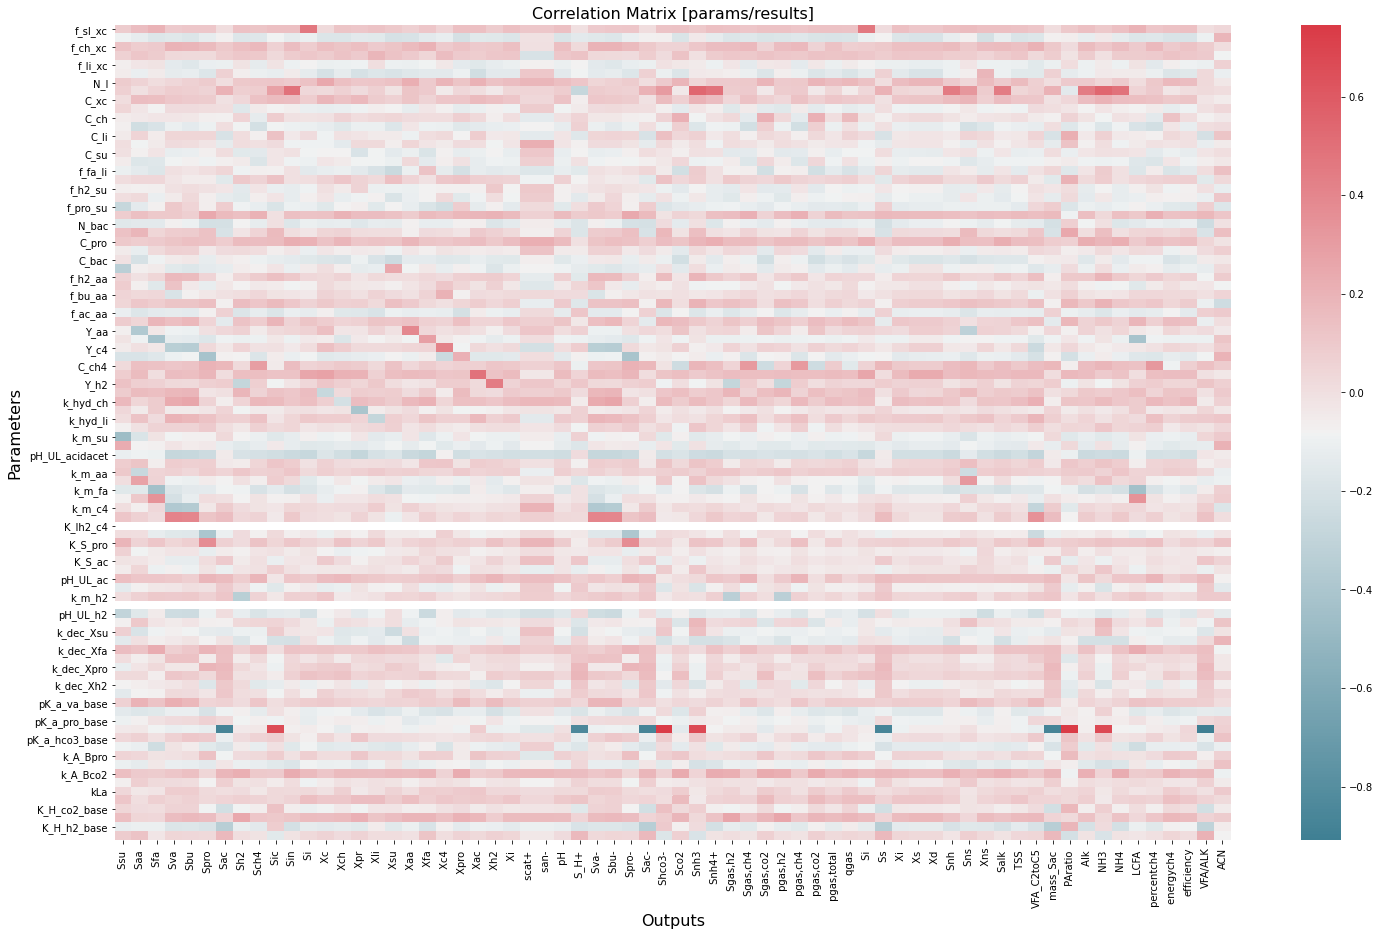

In [23]:
corr=inout.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr.iloc[0:92,92:-1], cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title('Correlation Matrix [params/results]',fontsize=16);
plt.ylabel('Parameters',fontsize=16)
plt.xlabel('Outputs',fontsize=16)